In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import pandas as pd

# Tratamento de Base de Dados

In [2]:
original_data = pd.read_csv("diabetes.csv", sep=',')
data = original_data.iloc[:, 1:]

X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

print(len(X))

767


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [6]:
#comentar feature scaling segundo o livro do rashcka
#falar do efeito positivo da normalização para o método do gradiente, demanda menos etapas para convergir
sc = StandardScaler()
sc.fit(X_train)

X_train_scaled = sc.transform(X_train.values)
X_test_scaled = sc.transform(X_test.values)

# Perceptron

In [7]:
ppn = Perceptron(max_iter=1000, eta0=0.15) #usa SGD (comentar que atualiza os w para cada amostra e "sorteia" as amostras, permitindo melhor convergência na busca pelo minimo global; fora que permite online learning)
#o batch gd (igual do vídeo passado) é bom para bases pequenas, mas ruim para bases grandes principalmente devido ao estouro de memória, fora que converge mais rápido
#minibatch tem características hibridas
ppn.fit(X_train, y_train.values.ravel())

Perceptron(eta0=0.15)

In [8]:
y_pred = ppn.predict(X_test)

In [9]:
confusion_matrix(y_test, y_pred)

array([[ 9, 70],
       [ 0, 37]], dtype=int64)

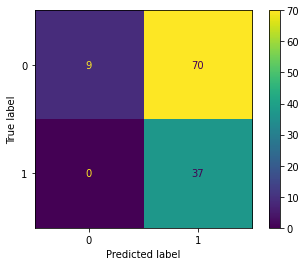

In [10]:
plot_confusion_matrix(ppn, X_test, y_test)

In [11]:
accuracy_score(y_test, y_pred)

0.39655172413793105

# Perceptron Multicamada

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
import random as python_random

SEED = 0

np.random.seed(SEED)
python_random.seed(SEED)
tf.random.set_seed(SEED)

In [14]:
ann = keras.Sequential()
ann.add(layers.Dense(6, activation='relu'))
ann.add(layers.Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
ann.fit(X_train, y_train, batch_size=16, epochs=2000)

Epoch 1/2000
41/41 [==============================] - 2s 1ms/step - loss: 16.2723 - accuracy: 0.3053 
Epoch 2/2000
41/41 [==============================] - 0s 625us/step - loss: 4.8138 - accuracy: 0.4197
Epoch 3/2000
41/41 [==============================] - 0s 575us/step - loss: 1.9362 - accuracy: 0.5952
Epoch 4/2000
41/41 [==============================] - 0s 600us/step - loss: 1.5052 - accuracy: 0.6146
Epoch 5/2000
41/41 [==============================] - 0s 575us/step - loss: 1.3666 - accuracy: 0.6410
Epoch 6/2000
41/41 [==============================] - 0s 600us/step - loss: 1.3627 - accuracy: 0.6265
Epoch 7/2000
41/41 [==============================] - 0s 575us/step - loss: 1.2159 - accuracy: 0.6431
Epoch 8/2000
41/41 [==============================] - 0s 576us/step - loss: 1.1014 - accuracy: 0.6682
Epoch 9/2000
41/41 [==============================] - 0s 600us/step - loss: 1.0869 - accuracy: 0.6479
Epoch 10/2000
41/41 [==============================] - 0s 550us/step - loss: 0.966

41/41 [==============================] - 0s 550us/step - loss: 0.6110 - accuracy: 0.6642
Epoch 81/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5829 - accuracy: 0.6928
Epoch 82/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5920 - accuracy: 0.6719
Epoch 83/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5528 - accuracy: 0.7184
Epoch 84/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5688 - accuracy: 0.7285
Epoch 85/2000
41/41 [==============================] - 0s 525us/step - loss: 0.6034 - accuracy: 0.6686
Epoch 86/2000
41/41 [==============================] - 0s 575us/step - loss: 0.5854 - accuracy: 0.6983
Epoch 87/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5826 - accuracy: 0.6848
Epoch 88/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5863 - accuracy: 0.7021
Epoch 89/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5850 - a

41/41 [==============================] - 0s 550us/step - loss: 0.5480 - accuracy: 0.7560
Epoch 160/2000
41/41 [==============================] - 0s 575us/step - loss: 0.5429 - accuracy: 0.7369
Epoch 161/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5388 - accuracy: 0.7302
Epoch 162/2000
41/41 [==============================] - 0s 575us/step - loss: 0.5509 - accuracy: 0.7423
Epoch 163/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5525 - accuracy: 0.7445
Epoch 164/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5474 - accuracy: 0.7396
Epoch 165/2000
41/41 [==============================] - 0s 575us/step - loss: 0.5603 - accuracy: 0.7209
Epoch 166/2000
41/41 [==============================] - 0s 575us/step - loss: 0.5682 - accuracy: 0.7103
Epoch 167/2000
41/41 [==============================] - 0s 549us/step - loss: 0.5809 - accuracy: 0.6911
Epoch 168/2000
41/41 [==============================] - 0s 575us/step - loss: 0

41/41 [==============================] - 0s 575us/step - loss: 0.5353 - accuracy: 0.7572
Epoch 238/2000
41/41 [==============================] - 0s 575us/step - loss: 0.5336 - accuracy: 0.7239
Epoch 239/2000
41/41 [==============================] - 0s 525us/step - loss: 0.5327 - accuracy: 0.7414
Epoch 240/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5117 - accuracy: 0.7543
Epoch 241/2000
41/41 [==============================] - 0s 575us/step - loss: 0.5296 - accuracy: 0.7540
Epoch 242/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5396 - accuracy: 0.7378
Epoch 243/2000
41/41 [==============================] - 0s 525us/step - loss: 0.5227 - accuracy: 0.7339
Epoch 244/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5419 - accuracy: 0.7353
Epoch 245/2000
41/41 [==============================] - 0s 575us/step - loss: 0.5274 - accuracy: 0.7556
Epoch 246/2000
41/41 [==============================] - 0s 550us/step - loss: 0

41/41 [==============================] - 0s 575us/step - loss: 0.5209 - accuracy: 0.7318
Epoch 316/2000
41/41 [==============================] - 0s 575us/step - loss: 0.5311 - accuracy: 0.7521
Epoch 317/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5119 - accuracy: 0.7603
Epoch 318/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5148 - accuracy: 0.7400
Epoch 319/2000
41/41 [==============================] - 0s 575us/step - loss: 0.5435 - accuracy: 0.7355
Epoch 320/2000
41/41 [==============================] - 0s 600us/step - loss: 0.5115 - accuracy: 0.7477
Epoch 321/2000
41/41 [==============================] - 0s 575us/step - loss: 0.5165 - accuracy: 0.7555
Epoch 322/2000
41/41 [==============================] - 0s 550us/step - loss: 0.4917 - accuracy: 0.7690
Epoch 323/2000
41/41 [==============================] - 0s 600us/step - loss: 0.5081 - accuracy: 0.7638
Epoch 324/2000
41/41 [==============================] - 0s 550us/step - loss: 0

41/41 [==============================] - 0s 600us/step - loss: 0.5124 - accuracy: 0.7559
Epoch 394/2000
41/41 [==============================] - 0s 601us/step - loss: 0.4853 - accuracy: 0.7530
Epoch 395/2000
41/41 [==============================] - 0s 650us/step - loss: 0.5114 - accuracy: 0.7409
Epoch 396/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4905 - accuracy: 0.7499
Epoch 397/2000
41/41 [==============================] - 0s 624us/step - loss: 0.5420 - accuracy: 0.7176
Epoch 398/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4855 - accuracy: 0.7638
Epoch 399/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4927 - accuracy: 0.7682
Epoch 400/2000
41/41 [==============================] - 0s 650us/step - loss: 0.5185 - accuracy: 0.7364
Epoch 401/2000
41/41 [==============================] - 0s 625us/step - loss: 0.5126 - accuracy: 0.7482
Epoch 402/2000
41/41 [==============================] - 0s 825us/step - loss: 0

41/41 [==============================] - 0s 575us/step - loss: 0.4829 - accuracy: 0.7708
Epoch 472/2000
41/41 [==============================] - 0s 650us/step - loss: 0.5034 - accuracy: 0.7422
Epoch 473/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4858 - accuracy: 0.7699
Epoch 474/2000
41/41 [==============================] - 0s 775us/step - loss: 0.4729 - accuracy: 0.7656
Epoch 475/2000
41/41 [==============================] - 0s 725us/step - loss: 0.4842 - accuracy: 0.7438
Epoch 476/2000
41/41 [==============================] - 0s 675us/step - loss: 0.4965 - accuracy: 0.7544
Epoch 477/2000
41/41 [==============================] - 0s 650us/step - loss: 0.5201 - accuracy: 0.7443
Epoch 478/2000
41/41 [==============================] - 0s 600us/step - loss: 0.5283 - accuracy: 0.7314
Epoch 479/2000
41/41 [==============================] - 0s 625us/step - loss: 0.5360 - accuracy: 0.7482
Epoch 480/2000
41/41 [==============================] - 0s 575us/step - loss: 0

41/41 [==============================] - 0s 550us/step - loss: 0.4934 - accuracy: 0.7513
Epoch 550/2000
41/41 [==============================] - 0s 625us/step - loss: 0.5103 - accuracy: 0.7496
Epoch 551/2000
41/41 [==============================] - 0s 600us/step - loss: 0.5036 - accuracy: 0.7633
Epoch 552/2000
41/41 [==============================] - 0s 600us/step - loss: 0.5032 - accuracy: 0.7521
Epoch 553/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4965 - accuracy: 0.7714
Epoch 554/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4999 - accuracy: 0.7326
Epoch 555/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4903 - accuracy: 0.7541
Epoch 556/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4892 - accuracy: 0.7463
Epoch 557/2000
41/41 [==============================] - 0s 575us/step - loss: 0.5211 - accuracy: 0.7501
Epoch 558/2000
41/41 [==============================] - 0s 600us/step - loss: 0

41/41 [==============================] - 0s 575us/step - loss: 0.4999 - accuracy: 0.7550
Epoch 628/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4559 - accuracy: 0.7766
Epoch 629/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4955 - accuracy: 0.7707
Epoch 630/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4940 - accuracy: 0.7614
Epoch 631/2000
41/41 [==============================] - 0s 675us/step - loss: 0.5141 - accuracy: 0.7533
Epoch 632/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4798 - accuracy: 0.7577
Epoch 633/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4834 - accuracy: 0.7672
Epoch 634/2000
41/41 [==============================] - 0s 775us/step - loss: 0.4890 - accuracy: 0.7799
Epoch 635/2000
41/41 [==============================] - 0s 725us/step - loss: 0.4766 - accuracy: 0.7741
Epoch 636/2000
41/41 [==============================] - 0s 725us/step - loss: 0

41/41 [==============================] - 0s 625us/step - loss: 0.4331 - accuracy: 0.8065
Epoch 706/2000
41/41 [==============================] - 0s 675us/step - loss: 0.5192 - accuracy: 0.7383
Epoch 707/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4913 - accuracy: 0.7762
Epoch 708/2000
41/41 [==============================] - 0s 600us/step - loss: 0.5021 - accuracy: 0.7472
Epoch 709/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4410 - accuracy: 0.7705
Epoch 710/2000
41/41 [==============================] - 0s 575us/step - loss: 0.5058 - accuracy: 0.7322
Epoch 711/2000
41/41 [==============================] - 0s 675us/step - loss: 0.4584 - accuracy: 0.7698
Epoch 712/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4803 - accuracy: 0.7546
Epoch 713/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5264 - accuracy: 0.7327
Epoch 714/2000
41/41 [==============================] - 0s 700us/step - loss: 0

41/41 [==============================] - 0s 650us/step - loss: 0.5161 - accuracy: 0.7503
Epoch 784/2000
41/41 [==============================] - 0s 600us/step - loss: 0.5209 - accuracy: 0.7407
Epoch 785/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4593 - accuracy: 0.7872
Epoch 786/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4483 - accuracy: 0.7822
Epoch 787/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4694 - accuracy: 0.7652
Epoch 788/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4571 - accuracy: 0.7637
Epoch 789/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4619 - accuracy: 0.7887
Epoch 790/2000
41/41 [==============================] - 0s 650us/step - loss: 0.5067 - accuracy: 0.7257
Epoch 791/2000
41/41 [==============================] - 0s 550us/step - loss: 0.4963 - accuracy: 0.7492
Epoch 792/2000
41/41 [==============================] - 0s 600us/step - loss: 0

41/41 [==============================] - 0s 625us/step - loss: 0.4792 - accuracy: 0.7540
Epoch 862/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4482 - accuracy: 0.7899
Epoch 863/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4938 - accuracy: 0.7706
Epoch 864/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4481 - accuracy: 0.7763
Epoch 865/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4773 - accuracy: 0.7725
Epoch 866/2000
41/41 [==============================] - 0s 675us/step - loss: 0.4712 - accuracy: 0.7844
Epoch 867/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4969 - accuracy: 0.7445
Epoch 868/2000
41/41 [==============================] - 0s 550us/step - loss: 0.4772 - accuracy: 0.7736
Epoch 869/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4548 - accuracy: 0.7824
Epoch 870/2000
41/41 [==============================] - 0s 625us/step - loss: 0

41/41 [==============================] - 0s 650us/step - loss: 0.5135 - accuracy: 0.7359
Epoch 940/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4806 - accuracy: 0.7664
Epoch 941/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4921 - accuracy: 0.7587
Epoch 942/2000
41/41 [==============================] - 0s 575us/step - loss: 0.5032 - accuracy: 0.7338
Epoch 943/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4908 - accuracy: 0.7749
Epoch 944/2000
41/41 [==============================] - 0s 675us/step - loss: 0.4768 - accuracy: 0.7666
Epoch 945/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4627 - accuracy: 0.7662
Epoch 946/2000
41/41 [==============================] - 0s 600us/step - loss: 0.5079 - accuracy: 0.7407
Epoch 947/2000
41/41 [==============================] - 0s 675us/step - loss: 0.4917 - accuracy: 0.7643
Epoch 948/2000
41/41 [==============================] - 0s 675us/step - loss: 0

41/41 [==============================] - 0s 625us/step - loss: 0.4476 - accuracy: 0.7877
Epoch 1018/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4711 - accuracy: 0.7643
Epoch 1019/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4561 - accuracy: 0.8042
Epoch 1020/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4974 - accuracy: 0.7671
Epoch 1021/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4980 - accuracy: 0.7560
Epoch 1022/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4644 - accuracy: 0.7683
Epoch 1023/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4979 - accuracy: 0.7482
Epoch 1024/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4900 - accuracy: 0.7625
Epoch 1025/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4864 - accuracy: 0.7695
Epoch 1026/2000
41/41 [==============================] - 0s 700us/step 

41/41 [==============================] - 0s 600us/step - loss: 0.4832 - accuracy: 0.7615
Epoch 1096/2000
41/41 [==============================] - 0s 650us/step - loss: 0.5011 - accuracy: 0.7707
Epoch 1097/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4724 - accuracy: 0.7981
Epoch 1098/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4846 - accuracy: 0.7491
Epoch 1099/2000
41/41 [==============================] - 0s 550us/step - loss: 0.5073 - accuracy: 0.7465
Epoch 1100/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4909 - accuracy: 0.7470
Epoch 1101/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4557 - accuracy: 0.7919
Epoch 1102/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4597 - accuracy: 0.7881
Epoch 1103/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4897 - accuracy: 0.7441
Epoch 1104/2000
41/41 [==============================] - 0s 650us/step 

41/41 [==============================] - 0s 625us/step - loss: 0.4577 - accuracy: 0.7848
Epoch 1173/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4738 - accuracy: 0.7788
Epoch 1174/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4596 - accuracy: 0.7750
Epoch 1175/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4644 - accuracy: 0.7750
Epoch 1176/2000
41/41 [==============================] - 0s 675us/step - loss: 0.4923 - accuracy: 0.7689
Epoch 1177/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4835 - accuracy: 0.7523
Epoch 1178/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4696 - accuracy: 0.7902
Epoch 1179/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4728 - accuracy: 0.7828
Epoch 1180/2000
41/41 [==============================] - 0s 600us/step - loss: 0.5343 - accuracy: 0.7069
Epoch 1181/2000
41/41 [==============================] - 0s 675us/step 

41/41 [==============================] - 0s 575us/step - loss: 0.4692 - accuracy: 0.7680
Epoch 1251/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4671 - accuracy: 0.7897
Epoch 1252/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4550 - accuracy: 0.7893
Epoch 1253/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4843 - accuracy: 0.7611
Epoch 1254/2000
41/41 [==============================] - 0s 675us/step - loss: 0.4762 - accuracy: 0.7789
Epoch 1255/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4707 - accuracy: 0.7431
Epoch 1256/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4747 - accuracy: 0.7719
Epoch 1257/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4653 - accuracy: 0.7863
Epoch 1258/2000
41/41 [==============================] - 0s 725us/step - loss: 0.4559 - accuracy: 0.7673
Epoch 1259/2000
41/41 [==============================] - 0s 625us/step 

41/41 [==============================] - 0s 650us/step - loss: 0.4430 - accuracy: 0.7943
Epoch 1328/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4717 - accuracy: 0.7805
Epoch 1329/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4720 - accuracy: 0.7812
Epoch 1330/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4608 - accuracy: 0.7729
Epoch 1331/2000
41/41 [==============================] - 0s 575us/step - loss: 0.5134 - accuracy: 0.7574
Epoch 1332/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4922 - accuracy: 0.7517
Epoch 1333/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4370 - accuracy: 0.7894
Epoch 1334/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4740 - accuracy: 0.7778
Epoch 1335/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4745 - accuracy: 0.7791
Epoch 1336/2000
41/41 [==============================] - 0s 550us/step 

41/41 [==============================] - 0s 625us/step - loss: 0.4750 - accuracy: 0.7515
Epoch 1405/2000
41/41 [==============================] - 0s 650us/step - loss: 0.5154 - accuracy: 0.7357
Epoch 1406/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4434 - accuracy: 0.7918
Epoch 1407/2000
41/41 [==============================] - 0s 675us/step - loss: 0.4810 - accuracy: 0.7786
Epoch 1408/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4431 - accuracy: 0.7916
Epoch 1409/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4659 - accuracy: 0.7755
Epoch 1410/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4785 - accuracy: 0.7563
Epoch 1411/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4842 - accuracy: 0.7553
Epoch 1412/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4971 - accuracy: 0.7638
Epoch 1413/2000
41/41 [==============================] - 0s 625us/step 

41/41 [==============================] - 0s 650us/step - loss: 0.4616 - accuracy: 0.7707
Epoch 1483/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4670 - accuracy: 0.7848
Epoch 1484/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4698 - accuracy: 0.7747
Epoch 1485/2000
41/41 [==============================] - 0s 725us/step - loss: 0.4367 - accuracy: 0.7980
Epoch 1486/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4717 - accuracy: 0.7736
Epoch 1487/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4692 - accuracy: 0.7839
Epoch 1488/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4487 - accuracy: 0.7896
Epoch 1489/2000
41/41 [==============================] - 0s 725us/step - loss: 0.4697 - accuracy: 0.7822
Epoch 1490/2000
41/41 [==============================] - 0s 825us/step - loss: 0.4447 - accuracy: 0.8016
Epoch 1491/2000
41/41 [==============================] - 0s 725us/step 

41/41 [==============================] - 0s 675us/step - loss: 0.4695 - accuracy: 0.7745
Epoch 1561/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4723 - accuracy: 0.7755
Epoch 1562/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4512 - accuracy: 0.7774
Epoch 1563/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4943 - accuracy: 0.7595
Epoch 1564/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4686 - accuracy: 0.7800
Epoch 1565/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4883 - accuracy: 0.7678
Epoch 1566/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4840 - accuracy: 0.7690
Epoch 1567/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4703 - accuracy: 0.7669
Epoch 1568/2000
41/41 [==============================] - 0s 675us/step - loss: 0.4559 - accuracy: 0.7893
Epoch 1569/2000
41/41 [==============================] - 0s 625us/step 

41/41 [==============================] - 0s 575us/step - loss: 0.4686 - accuracy: 0.7707
Epoch 1639/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4953 - accuracy: 0.7649
Epoch 1640/2000
41/41 [==============================] - 0s 675us/step - loss: 0.4912 - accuracy: 0.7345
Epoch 1641/2000
41/41 [==============================] - 0s 700us/step - loss: 0.4349 - accuracy: 0.7949
Epoch 1642/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4402 - accuracy: 0.7819
Epoch 1643/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4679 - accuracy: 0.7640
Epoch 1644/2000
41/41 [==============================] - 0s 700us/step - loss: 0.5017 - accuracy: 0.7506
Epoch 1645/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4797 - accuracy: 0.7498
Epoch 1646/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4783 - accuracy: 0.7564
Epoch 1647/2000
41/41 [==============================] - 0s 600us/step 

41/41 [==============================] - 0s 600us/step - loss: 0.4561 - accuracy: 0.7828
Epoch 1717/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4563 - accuracy: 0.7823
Epoch 1718/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4605 - accuracy: 0.7790
Epoch 1719/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4587 - accuracy: 0.7842
Epoch 1720/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4806 - accuracy: 0.7862
Epoch 1721/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4890 - accuracy: 0.7578
Epoch 1722/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4569 - accuracy: 0.7659
Epoch 1723/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4428 - accuracy: 0.8016
Epoch 1724/2000
41/41 [==============================] - 0s 675us/step - loss: 0.4470 - accuracy: 0.8071
Epoch 1725/2000
41/41 [==============================] - 0s 600us/step 

41/41 [==============================] - 0s 600us/step - loss: 0.4674 - accuracy: 0.7805
Epoch 1795/2000
41/41 [==============================] - 0s 675us/step - loss: 0.4707 - accuracy: 0.7752
Epoch 1796/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4541 - accuracy: 0.7725
Epoch 1797/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4666 - accuracy: 0.7576
Epoch 1798/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4868 - accuracy: 0.7725
Epoch 1799/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4825 - accuracy: 0.7769
Epoch 1800/2000
41/41 [==============================] - 0s 700us/step - loss: 0.4652 - accuracy: 0.7749
Epoch 1801/2000
41/41 [==============================] - 0s 675us/step - loss: 0.4649 - accuracy: 0.7865
Epoch 1802/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4542 - accuracy: 0.7957
Epoch 1803/2000
41/41 [==============================] - 0s 575us/step 

41/41 [==============================] - 0s 600us/step - loss: 0.4849 - accuracy: 0.7600
Epoch 1873/2000
41/41 [==============================] - 0s 650us/step - loss: 0.4890 - accuracy: 0.7664
Epoch 1874/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4632 - accuracy: 0.7663
Epoch 1875/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4355 - accuracy: 0.7919
Epoch 1876/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4849 - accuracy: 0.7762
Epoch 1877/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4492 - accuracy: 0.7892
Epoch 1878/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4580 - accuracy: 0.7954
Epoch 1879/2000
41/41 [==============================] - 0s 575us/step - loss: 0.5088 - accuracy: 0.7621
Epoch 1880/2000
41/41 [==============================] - 0s 575us/step - loss: 0.4354 - accuracy: 0.8067
Epoch 1881/2000
41/41 [==============================] - 0s 575us/step 

41/41 [==============================] - 0s 725us/step - loss: 0.4968 - accuracy: 0.7514
Epoch 1951/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4692 - accuracy: 0.7729
Epoch 1952/2000
41/41 [==============================] - 0s 675us/step - loss: 0.4858 - accuracy: 0.7479
Epoch 1953/2000
41/41 [==============================] - 0s 625us/step - loss: 0.4558 - accuracy: 0.7908
Epoch 1954/2000
41/41 [==============================] - 0s 725us/step - loss: 0.4883 - accuracy: 0.7515
Epoch 1955/2000
41/41 [==============================] - 0s 700us/step - loss: 0.4713 - accuracy: 0.7718
Epoch 1956/2000
41/41 [==============================] - 0s 700us/step - loss: 0.4843 - accuracy: 0.7707
Epoch 1957/2000
41/41 [==============================] - 0s 650us/step - loss: 0.5022 - accuracy: 0.7576
Epoch 1958/2000
41/41 [==============================] - 0s 600us/step - loss: 0.4507 - accuracy: 0.7827
Epoch 1959/2000
41/41 [==============================] - 0s 675us/step 

In [16]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [17]:
confusion_matrix(y_test, y_pred)

array([[69, 10],
       [ 9, 28]], dtype=int64)

In [18]:
accuracy_score(y_test, y_pred)

0.8362068965517241